In [1]:
import BIAS_classes as BIAS
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import Mather_photonNEP12a as NEP

SyntaxError: invalid syntax (<ipython-input-1-abb6f69bc0ef>, line 1)

In [2]:
#Constants
c = 299792458.0                                         # Speed of light - [c] = m/s
h_p = 6.626068e-34                                      # Planck's constant in SI units
k_b = 1.38065e-23                                       # Boltzmann constant in SI units
MJyperSrtoSI = 1E-20
GHztoHz = 1E9
h = 4.135*10**(-15) #in eV s
k = 8.617*10**(-5) # eV/K
m = 9.109*10**(-31) # kg
TCMB = 2.725 # K
# canonical CMB


#Specify parameter values

#Galaxy cluster parameters
y = 5.4e-5
electron_temperature = 5.0 #KeV
tau = MCSZ.y_to_tau(y,electron_temperature)
peculiar_vel = 0.0000001 #km/s
betac = peculiar_vel/(3e5)

#SIDES model values
amp_sides = 1
b_sides = 1

#Specify which SIDES pixel to look at 
SIDES_longitude = 120
SIDES_latitude = 120

#CMB anisotropies values
amp_ksz = 0#6e-7
amp_tsz = 0#6e-7
amp_cmb = 0#1e-6

#Integration time

labels = ('tau','temperature','betac','amp_sides','b_sides')
theta = (y, electron_temperature, betac, amp_sides, b_sides)
anisotropies = (amp_ksz, amp_tsz, amp_cmb)

In [3]:
def sigB(band_details, Time):
    # Use for apples to apples with OLIMPO photo
    
    BW_GHz = band_details['nu_meanGHz']*band_details['FBW']
    
    nu_min = (band_details['nu_meanGHz'] - 0.5*BW_GHz)*1E9 
    nu_max = (band_details['nu_meanGHz'] + 0.5*BW_GHz)*1E9 
    nu_res = band_details['nu_resGHz']*1E9
    Npx = band_details['N_pixels']
    
    NEP_tot = (band_details['NEP_aWrtHz'])*1E-18
    Nse = int(np.round(BW_GHz/band_details['nu_resGHz']))
    nu_vec = np.linspace(nu_min, nu_max, Nse)
    AOnu = (c/nu_vec)**2
    
    inefficiency = 0.019
    delP = 2.0*NEP_tot/np.sqrt(Time*Npx)#*np.sqrt(2.0*nu_max/nu_res)
    sigma_B = delP/(AOnu)/nu_res/inefficiency
 
    return nu_vec, sigma_B

In [4]:
freq = np.linspace(80e9,720e9,1000)
templates_emission_lines = MCSZ.data_indv(theta, anisotropies, freq, SIDES_longitude, SIDES_latitude)

/home/bolocam/erapaport/OLIMPO-forecasting/MCMC_SOFTS_A2A_ICM.py:86: RuntimeWarning: divide by zero encountered in log
  f = interp1d(np.log(datax),np.log(datay),kind='slinear',bounds_error=False,fill_value=0)


In [5]:
templates_continuum = MCSZ.model_indv(theta,anisotropies,freq)

In [6]:
rms_values = [0.36, 0.27, 0.70, 1.76] #uK^2 for 80 hour integration
#rms_values = [0.72, 0.54, 1.40, 3.52] #uK^2 for 20 hour integration

frequencies = [145,250,365,460]

In [7]:
x = h_p*np.array(frequencies)*1e9/(k_b*TCMB)
print(x)

[2.55372299 4.40297068 6.42833719 8.10146605]


In [8]:
nu_total_array = np.array(frequencies)
sigma_b_array = 2*k_b*((np.array(frequencies)*1e9/c)**2)*(x/(np.exp(x)-1))*(x * np.exp(x))/(np.exp(x)-1)*np.array(rms_values)*1e-6

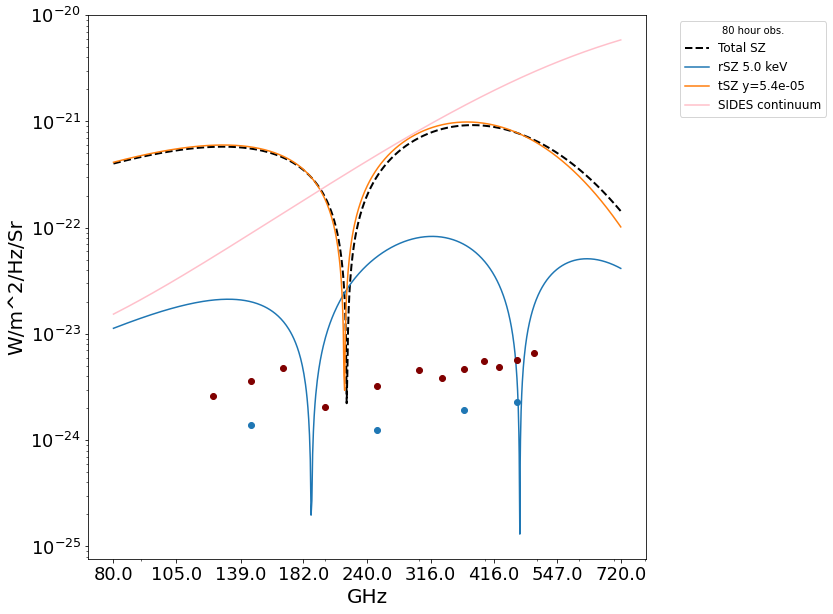

In [9]:
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
labs = ['SZ','CIB','CMB. anis. ' + str(round(amp_cmb*1e6)) + ' uK','ksz anis. ' + str(amp_ksz*1e6) + ' uK','tsz anis. y=' + str(amp_tsz)]
tempcolors = ['blue','mediumspringgreen','indigo','red','green','purple','magenta','black','violet','gray']
plt.figure(figsize=(10,10))

#Plot CMB, ksz, tsz, anisotropies
#for i in range(len(templates_emission_lines)-2):
#    plt.plot(freq*1e-9,abs(templates_emission_lines[i+2]),color=tempcolors[i],label=labs[i+2],linewidth=2)
    
#Plot SZ components
plt.plot(freq*1e-9,abs(templates_emission_lines[0]),'--k',label='Total SZ',linewidth=2)
#plt.plot(freq*1e-9,abs(templates_emission_lines[0] - MCSZ.szpack_signal(freq,MCSZ.y_to_tau(y,electron_temperature),electron_temperature,1e-11)),\
#         label='kSZ ' + str(betac*3e5) + ' km/s')
plt.plot(freq*1e-9,abs(MCSZ.szpack_signal(freq,MCSZ.y_to_tau(y,electron_temperature),electron_temperature,1e-11) - \
                  MCSZ.classical_tsz(y,freq)),label='rSZ ' + str(electron_temperature) + ' keV')
plt.plot(freq*1e-9,abs(MCSZ.classical_tsz(y,freq)),label='tSZ y=' + str(y))

#SIDES continuum model and emission line data
plt.plot(freq*1e-9,abs(templates_continuum[1]),color='pink',label='SIDES continuum')

#Plot frequency channel NESB
plt.scatter(nu_total_array,sigma_b_array)

#Time, Timelabel = 86400, '1 day' #1 day
#Time, Timelabel = 72000, '20 hours'
Time, Timelabel = 288000, '80 hours'

pix1 = 50
pix2 = 136
pix3 = 282
pix4 = 460

pixset=[pix1, pix2, pix3, pix4]

pixtot = pix1+pix2+pix3+pix4

# I tune these by eye so that we get 5 channels per sub-band
res1 = 17
res2 = 39
res3 = 26
res4 = 27

NEP1 = np.sqrt(8.87**2 + 3.1**2)
NEP2 = np.sqrt(10.4**2 + 2.53**2)
NEP3 = np.sqrt(6.9**2 + 1.37**2)
NEP4 = np.sqrt(7.12**2 + 1.00**2) # all in aW/rtHz units

Bands_list1 = [{'name':'Band 1','nu_meanGHz':145,'FBW':0.3,'nu_resGHz':res1,'NEP_aWrtHz':NEP1,'N_pixels':pix1},\
      {'name':'Band 2','nu_meanGHz':250,'FBW':0.4,'nu_resGHz':res2,'NEP_aWrtHz':NEP2,'N_pixels':pix2},\
      {'name':'Band 3','nu_meanGHz':365,'FBW':0.18,'nu_resGHz':res3,'NEP_aWrtHz':NEP3,'N_pixels':pix3},\
      {'name':'Band 4','nu_meanGHz':460,'FBW':0.15,'nu_resGHz':res4,'NEP_aWrtHz':NEP4,'N_pixels':pix4}]

ncolor = len(Bands_list1)
color=iter(cm.gray_r(np.linspace(1,0.8,ncolor+1)))
for bb in range(ncolor):
    b1 = Bands_list1[bb]
    nu_vec_b1, sigma_B_b1 = sigB(b1, Time)

    colr=next(color)
    plt.plot(nu_vec_b1*1e-9, sigma_B_b1,'o', lw=7, alpha=1, color='maroon')#, label=b1['name'] +' Nspx='+str(b1['N_pixels'])

plt.xscale('log')
plt.yscale('log')
#plt.xlim([80, 720])
#plt.ylim(1E-27, 2E-20)
plt.xlabel('GHz',fontsize=20)
plt.ylabel('W/m^2/Hz/Sr',fontsize=20)

#Make xticks match as best as possible
plt.xticks(np.rint(np.logspace(np.log10(80), np.log10(7.2e2),num=9)),np.rint(np.logspace(np.log10(80), np.log10(7.2e2),num=9)))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',\
           frameon=True, prop={'size':12}, ncol=1, title= '80 hour obs.')
plt.show()